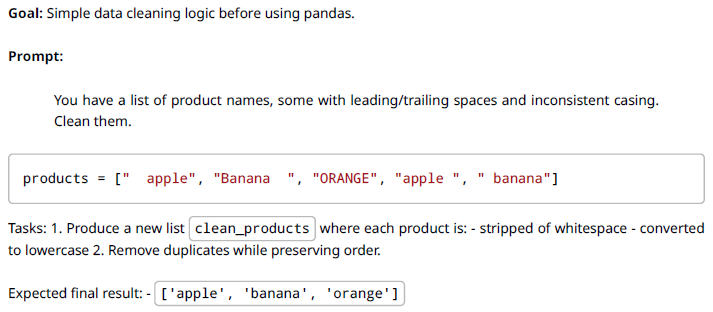

In [1]:
import pandas as pd

In [2]:
products = [" apple", "Banana ", "ORANGE", "apple ", " banana"]

In [3]:
newList = list(set(product.strip().lower() for product in products))

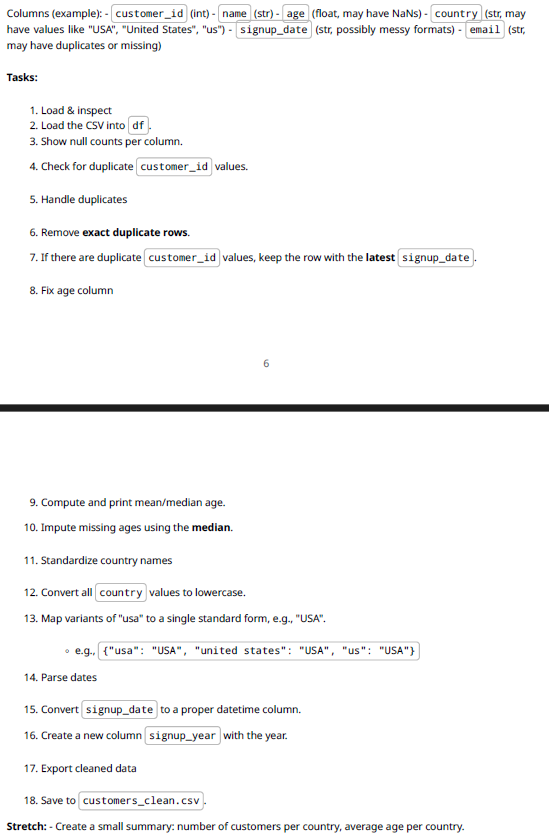

In [4]:
from IPython.display import Image
image_path = 'image.png'
Image(filename=image_path)


In [5]:

df = pd.read_csv("customers_raw.csv", encoding = 'ISO-8859-1')
df

,customer_id,name,age,country,signup_date,email
0,1,Alice Johnson,29.0,USA,1/15/2024,alice@example.com
1,2,Bob Smith,35.0,United States,15/02/2024,bob.smith@example.com
2,3,Carlos Diaz,NaN,us,3/10/2024,carlos@example.com
3,4,Diana Müller,42.0,Germany,3/18/2024,diana@example.com
4,5,Emma Rossi,31.0,usa,March 5 2024,emma@example.com
5,6,Faisal Khan,27.0,Canada,2/1/2024,faisal@example.com
6,7,Grace Lee,NaN,united states,1/28/2024,grace.lee@example.com
7,8,Henry Brown,38.0,UK,2/20/2024,henry@example.com
8,9,Irene Garcia,24.0,mexico,3/2/2024,irene@example.com
9,10,John Doe,50.0,US,3/5/2024,john@example.com


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  12 non-null     int64  
 1   name         12 non-null     object 
 2   age          9 non-null      float64
 3   country      12 non-null     object 
 4   signup_date  12 non-null     object 
 5   email        12 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 708.0+ bytes


In [7]:
df.head()

,customer_id,name,age,country,signup_date,email
0,1,Alice Johnson,29.0,USA,1/15/2024,alice@example.com
1,2,Bob Smith,35.0,United States,15/02/2024,bob.smith@example.com
2,3,Carlos Diaz,NaN,us,3/10/2024,carlos@example.com
3,4,Diana Müller,42.0,Germany,3/18/2024,diana@example.com
4,5,Emma Rossi,31.0,usa,March 5 2024,emma@example.com


In [8]:
duplicate_count = df['customer_id'].duplicated().sum()


In [9]:
df = df.drop_duplicates()

In [10]:
print(df.duplicated().sum())

0


In [11]:
df = df.sort_values('signup_date', ascending=False).drop_duplicates('customer_id', keep='first')


In [12]:
df['age'] = df['age'].fillna(df['age'].median())


In [13]:
mean_age = df['age'].mean()
median_age = df['age'].median()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")

Mean Age: 34.2
Median Age: 33.0


In [14]:
df['country'] = df['country'].str.lower()

df['country'] = df['country'].replace({
    'usa': 'usa',
    'united states': 'usa',
    'us': 'usa'
})


In [15]:
df

,customer_id,name,age,country,signup_date,email
4,5,Emma Rossi,31.0,usa,March 5 2024,emma@example.com
9,10,John Doe,50.0,usa,3/5/2024,john@example.com
8,9,Irene Garcia,24.0,mexico,3/2/2024,irene@example.com
3,4,Diana Müller,42.0,germany,3/18/2024,diana@example.com
2,3,Carlos Diaz,33.0,usa,3/10/2024,carlos@example.com
7,8,Henry Brown,38.0,uk,2/20/2024,henry@example.com
5,6,Faisal Khan,27.0,canada,2/1/2024,faisal@example.com
1,2,Bob Smith,35.0,usa,15/02/2024,bob.smith@example.com
6,7,Grace Lee,33.0,usa,1/28/2024,grace.lee@example.com
0,1,Alice Johnson,29.0,usa,1/15/2024,alice@example.com


In [16]:
df2 = df
months = {'March': '3'}

def datetime(time):
    vals = time.split(' ')
    if len(vals) == 1:
        return vals[0]
    return months[vals[0]] + '/' + vals[1] + '/' + vals[2]
df2['signup_date'] = df['signup_date'].apply(datetime)
df2['signup_year'] = df['signup_date'].apply(lambda x: x[-4:])
# df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')


In [17]:
print(df['signup_date'])
df

4      3/5/2024
9      3/5/2024
8      3/2/2024
3     3/18/2024
2     3/10/2024
7     2/20/2024
5      2/1/2024
1    15/02/2024
6     1/28/2024
0     1/15/2024
Name: signup_date, dtype: object


,customer_id,name,age,country,signup_date,email,signup_year
4,5,Emma Rossi,31.0,usa,3/5/2024,emma@example.com,2024
9,10,John Doe,50.0,usa,3/5/2024,john@example.com,2024
8,9,Irene Garcia,24.0,mexico,3/2/2024,irene@example.com,2024
3,4,Diana Müller,42.0,germany,3/18/2024,diana@example.com,2024
2,3,Carlos Diaz,33.0,usa,3/10/2024,carlos@example.com,2024
7,8,Henry Brown,38.0,uk,2/20/2024,henry@example.com,2024
5,6,Faisal Khan,27.0,canada,2/1/2024,faisal@example.com,2024
1,2,Bob Smith,35.0,usa,15/02/2024,bob.smith@example.com,2024
6,7,Grace Lee,33.0,usa,1/28/2024,grace.lee@example.com,2024
0,1,Alice Johnson,29.0,usa,1/15/2024,alice@example.com,2024


In [18]:
# df['signup_date'] = pd.to_datetime(df['signup_date'], dayfirst=True, errors='coerce')


In [19]:
print(df)

   customer_id           name   age  country signup_date  \
4            5     Emma Rossi  31.0      usa    3/5/2024   
9           10       John Doe  50.0      usa    3/5/2024   
8            9   Irene Garcia  24.0   mexico    3/2/2024   
3            4   Diana Müller  42.0  germany   3/18/2024   
2            3    Carlos Diaz  33.0      usa   3/10/2024   
7            8    Henry Brown  38.0       uk   2/20/2024   
5            6    Faisal Khan  27.0   canada    2/1/2024   
1            2      Bob Smith  35.0      usa  15/02/2024   
6            7      Grace Lee  33.0      usa   1/28/2024   
0            1  Alice Johnson  29.0      usa   1/15/2024   

                   email signup_year  
4       emma@example.com        2024  
9       john@example.com        2024  
8      irene@example.com        2024  
3      diana@example.com        2024  
2     carlos@example.com        2024  
7      henry@example.com        2024  
5     faisal@example.com        2024  
1  bob.smith@example.com   

In [20]:
print(df['signup_year'])

4    2024
9    2024
8    2024
3    2024
2    2024
7    2024
5    2024
1    2024
6    2024
0    2024
Name: signup_year, dtype: object


In [21]:
df.to_csv('customers_clean.csv', index=False)

